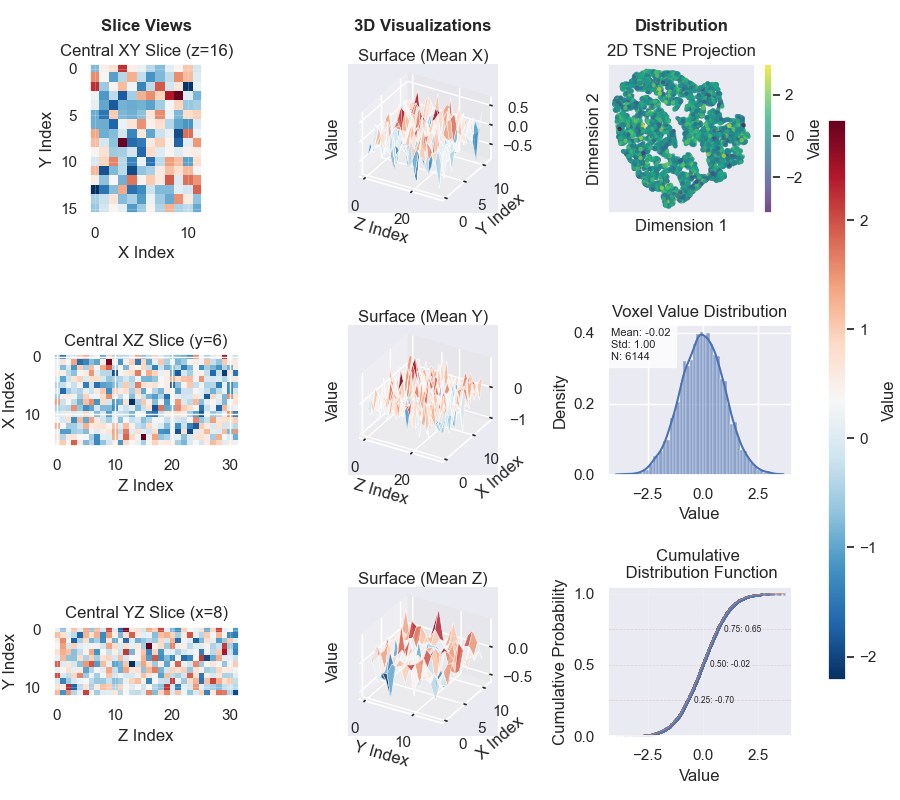

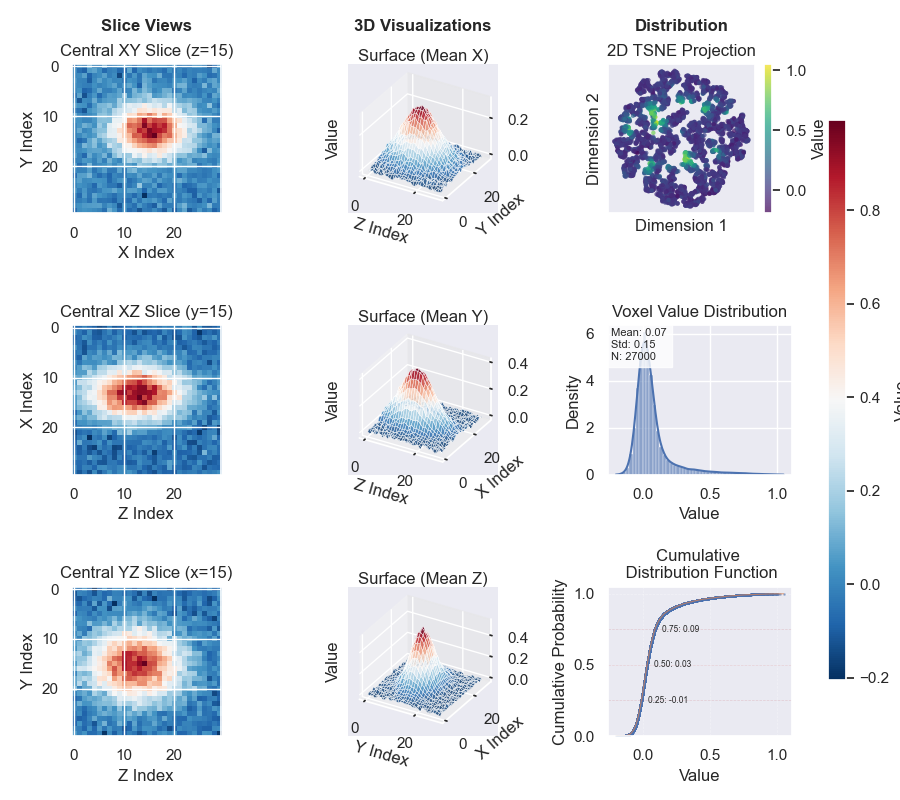

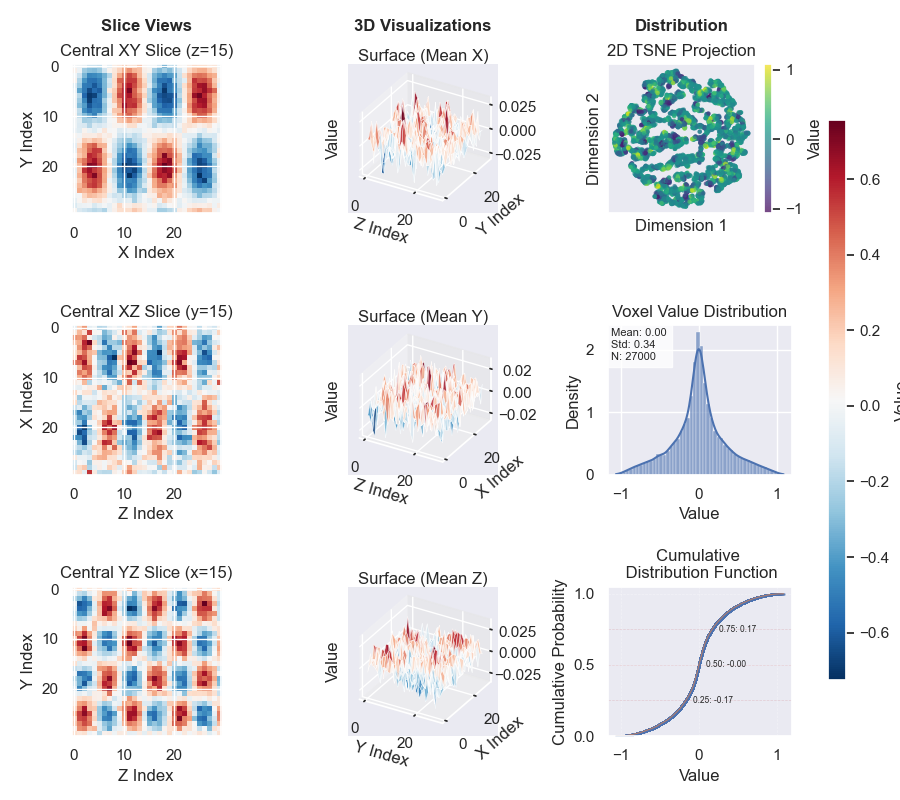

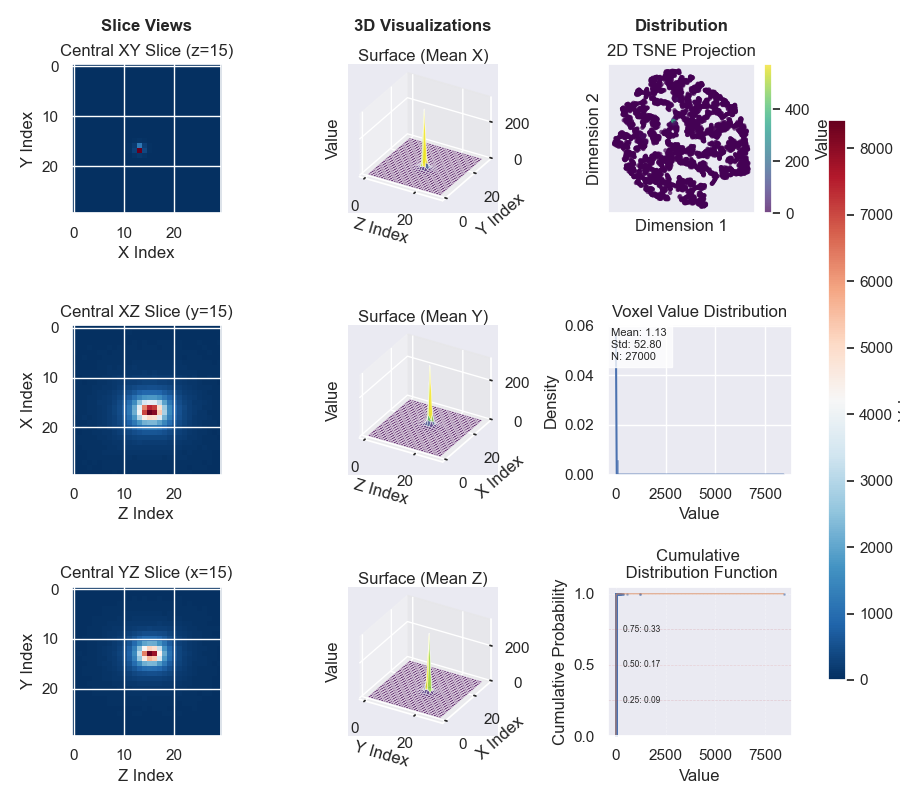

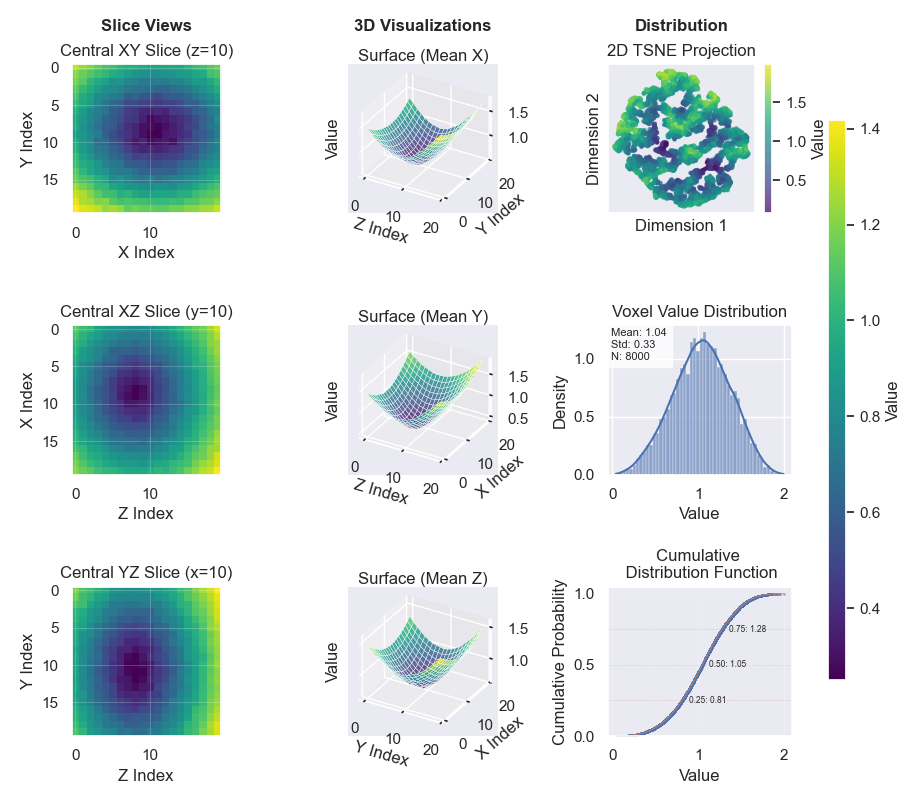

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')  # Adjust this if needed

import numpy as np
from alltheplots import plot, set_log_level
from IPython.display import display, Image

import seaborn as sns
import matplotlib.pyplot as plt

# Set a dark background theme
sns.set_theme(style="ticks", palette="deep")
plt.style.use("dark_background")
sns.set_theme(style="darkgrid", palette="deep")

# Reduce log noise
set_log_level('WARNING')

# --- Define modified interesting 3D functions ---

def gaussian_3d_mod(resolution=30, sigma=(0.5, 0.7, 0.9), offset=(0.2, -0.1, 0.3), size=2, noise_level=0.05):
    """
    Create a 3D Gaussian density field with different sigma for each dimension,
    with an offset and added noise.
    """
    x = np.linspace(-size, size, resolution) + offset[0]
    y = np.linspace(-size, size, resolution) + offset[1]
    z = np.linspace(-size, size, resolution) + offset[2]
    xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')
    gauss = np.exp(-((xx**2)/(2*sigma[0]**2) + (yy**2)/(2*sigma[1]**2) + (zz**2)/(2*sigma[2]**2)))
    noise = np.random.normal(scale=noise_level, size=gauss.shape)
    return gauss + noise

def sine_3d_mod(resolution=30, freq=(1, 2, 3), phase=(0.1, 0.2, 0.3), offset=(0.2, -0.2, 0.1), size=2*np.pi, noise_level=0.05):
    """
    Create a 3D sine wave pattern with different frequencies and phases for each dimension,
    an offset, and added noise.
    """
    x = np.linspace(0, size, resolution) * freq[0] + offset[0]
    y = np.linspace(0, size, resolution) * freq[1] + offset[1]
    z = np.linspace(0, size, resolution) * freq[2] + offset[2]
    xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')
    s = np.sin(xx + phase[0]) * np.sin(yy + phase[1]) * np.sin(zz + phase[2])
    noise = np.random.normal(scale=noise_level, size=s.shape)
    return s + noise

def dipole_field_magnitude_mod(resolution=30, size=2, dipole_offset=(0.3, -0.2, 0.1), noise_level=0.05):
    """
    Compute a modified dipole electric field magnitude, shifting the dipole from the origin
    and adding noise.
    """
    x = np.linspace(-size, size, resolution)
    y = np.linspace(-size, size, resolution)
    z = np.linspace(-size, size, resolution)
    # Shift grid by dipole_offset
    xx, yy, zz = np.meshgrid(x - dipole_offset[0], y - dipole_offset[1], z - dipole_offset[2], indexing='ij')
    r = np.sqrt(xx**2 + yy**2 + zz**2)
    r[r == 0] = 1e-10  # Avoid division by zero
    E = (1/(r**3)) * np.sqrt(1 + 3 * (zz/r)**2)
    noise = np.random.normal(scale=noise_level, size=E.shape)
    return E + noise

def sphere_distance_field_mod(size=20, scale=(1.0, 0.8, 1.2), offset=(0.1, -0.1, 0.2), noise_level=0.02):
    """
    Create a non-symmetric distance field from the center with different scales and offsets for each axis,
    and add some noise.
    """
    x = np.linspace(-1, 1, size) * scale[0] + offset[0]
    y = np.linspace(-1, 1, size) * scale[1] + offset[1]
    z = np.linspace(-1, 1, size) * scale[2] + offset[2]
    xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')
    d = np.sqrt(xx**2 + yy**2 + zz**2)
    noise = np.random.normal(scale=noise_level, size=d.shape)
    return d + noise

# --- Create a list of enhanced 3D arrays for testing ---

arrays_3d = [
    np.random.randn(16, 12, 32),            # Random 3D volume (for reference)
    gaussian_3d_mod(),                      # Modified 3D Gaussian density field
    sine_3d_mod(),                          # Modified 3D sine wave pattern
    dipole_field_magnitude_mod(),           # Modified dipole field magnitude
    sphere_distance_field_mod(),            # Modified non-symmetric distance from center field
]

# --- Plot and display each enhanced 3D example ---

for i, arr in enumerate(arrays_3d):
    filename = f'../plot_outputs/plot3d_modified_{i}.png'
    # Plot the array (with show=False to prevent interactive windows)
    plot(arr, filename=filename, dpi=100, show=False)
    # Display the saved image in the notebook
    display(Image(filename))
